In [148]:
%pip install ucimlrepo

## **Assignment 10**

### <font color='orange'> Task - 1: Data Loading and Preprocessing (2 Marks) </font>:
1. Load the [UCI Seeds dataset](https://archive.ics.uci.edu/dataset/236/seeds).
2. Check for missing values and duplicate rows in the dataset.
3. Handle any missing or duplicate data appropriately.

Marks Distribution:

1. Loading and displaying dataset: 1 mark
2. Checking and handling missing/duplicate data: 1 mark

In [149]:
import pandas as pd
import requests
from io import StringIO

# URL of the Seeds dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Download the dataset
response = requests.get(url)
data = response.text
column_names = ['area', 'perimeter', 'compactness', 'length_of_kernel', 'width_of_kernel', 'asymmetry_coefficient', 'length_of_kernel_groove', 'class']
df_seeds = pd.read_csv(StringIO(data), sep=r'\s+', header=None, names=column_names)

# Separate features and target
X = df_seeds.drop(columns=['class'])
y = df_seeds['class']

print("\nMissing values per column:")
display(df_seeds.isnull().sum())

# NO missing data so we don't have to impute anything


Missing values per column:


,0
area,0
perimeter,0
compactness,0
length_of_kernel,0
width_of_kernel,0
asymmetry_coefficient,0
length_of_kernel_groove,0
class,0


### <font color='orange'> Task - 2: K-Means Clustering Implementation from Scratch (6 Marks) </font>:

1. Implement the K-Means algorithm from scratch.
2. Use K-Means++ initialization to select initial centroids.
3. Perform clustering with 3 clusters.
4. Display the final cluster centroids and the number of samples in each cluster.

Marks Distribution:

1. Correct implementation of K-Means algorithm logic: 3 marks
2. Proper use of K-Means++ initialization: 2 marks
3. Display and interpretation of results: 1 mark

In [150]:
import numpy as np

def kmeans_plusplus_init(X, k):
    n_samples, n_features = X.shape
    centroids = np.zeros((k, n_features))

    # Choose the first centroid randomly
    first_centroid_idx = np.random.randint(n_samples)
    centroids[0] = X[first_centroid_idx]

    # Initialize a set to keep track of chosen centroid indices
    chosen_centroid_indices = {first_centroid_idx}

    # Choose the remaining k-1 centroids
    while(len(chosen_centroid_indices) <k):
        distances_sq = np.min(np.sum((X[:, np.newaxis] - X[list(chosen_centroid_indices)])**2, axis=2), axis=1)
        probabilities = distances_sq / np.sum(distances_sq)
        next_centroid_idx = np.random.choice(n_samples, p=probabilities)
        chosen_centroid_indices.add(next_centroid_idx)
    centroids = X[list(chosen_centroid_indices)]
    return centroids

In [151]:

def kmeans_from_scratch(X, k, max_iterations=300):

    n_samples = X.shape[0]

    # Initialize centroids using K-Means++
    centroids = kmeans_plusplus_init(X, k)

    # Initialize cluster labels
    labels = np.zeros(n_samples, dtype=int)

    for iteration in range(max_iterations):
        # Assign each sample to the closest centroid
        for i in range(n_samples):
            distances = np.sum((X[i] - centroids)**2, axis=1)
            labels[i] = np.argmin(distances)

        # Update centroids by calculating the mean of assigned samples
        prev_centroids = centroids.copy()
        for i in range(k):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                centroids[i] = np.mean(points_in_cluster, axis=0)



    return centroids, labels



In [152]:
# Perform K-Means clustering with 3 clusters
k = 3
centroids_scratch, labels_scratch = kmeans_from_scratch(X.values, k)

# Display the final cluster centroids
print("\nFinal Cluster Centroids (from scratch):")
display(pd.DataFrame(centroids_scratch, columns=X.columns))

# Display the number of samples in each cluster
print("\nNumber of samples in each cluster (from scratch):")
cluster_counts_scratch = pd.Series(labels_scratch).value_counts().sort_index()
print(cluster_counts_scratch)


Final Cluster Centroids (from scratch):


,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove
0,14.648472,14.460417,0.879167,5.563778,3.277903,2.648933,5.192319
1,18.721803,16.297377,0.885087,6.208934,3.722672,3.603590,6.066098
2,11.964416,13.274805,0.852200,5.229286,2.872922,4.759740,5.088519



Number of samples in each cluster (from scratch):
0    72
1    61
2    77
Name: count, dtype: int64


In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
df_seeds['Cluster'] = labels_scratch

In [155]:
centroids_scratch

array([[14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948]])

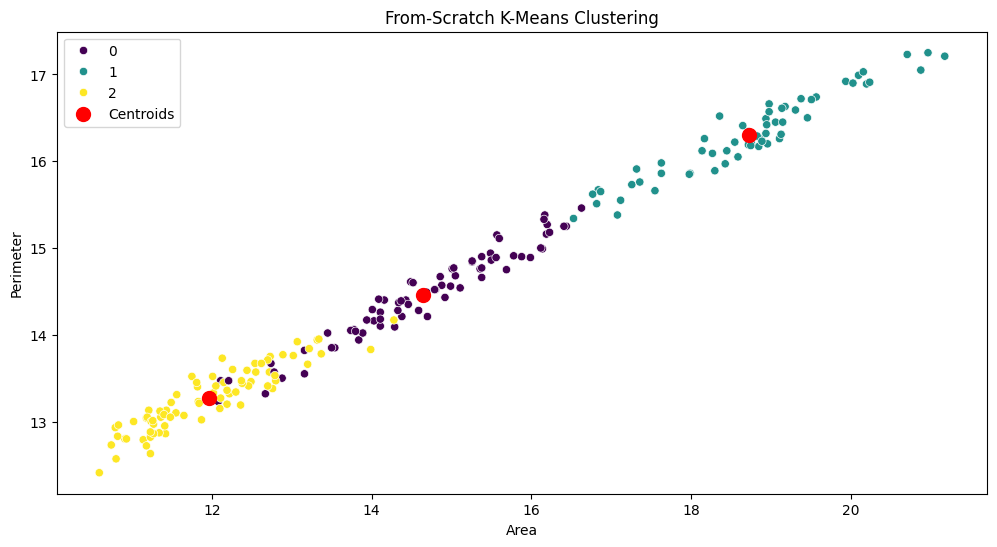

In [156]:
# Visualize from-scratch clusters and centroids
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_seeds, x="area", y="perimeter", hue="Cluster", palette="viridis", legend="full")
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], c='red', marker='o', s=100, label='Centroids')
plt.title('From-Scratch K-Means Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()

### <font color='orange'> Task - 3: Cluster Evaluation (2 Marks) </font>:

1. Evaluate the silhouette and Rand scores using scikit-learn functions.

Marks Distribution:

1. Correct computation of silhouette (1 mark) and Rand (1 mark) scores: 2 marks


In [157]:
from sklearn.metrics import silhouette_score, rand_score
sil_score = silhouette_score(X, labels_scratch)
rand_score_value = rand_score(
    y, labels_scratch
)
print(f"Silhouette Score: {sil_score}")
print(f"Rand Score: {rand_score_value}")

Silhouette Score: 0.4719337319126887
Rand Score: 0.8743677375256322


### <font color='orange'> Task - 4: Ground Truth Comparison and Label Assignment (4 Marks) </font>:

1. Using the ground truth labels available in the dataset, create a table showing how many samples of each true class fall into each cluster.
2. For each cluster, assign the majority class label to that cluster.
3. Compute accuracy, precision, and recall based on this assignment.

Marks Distribution:

1. Correct tabular comparison of clusters vs. true labels: 2 mark
2. Correct label assignment and metric computation: 2 marks

In [158]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a cross-tabulation
cross_tab_scratch = pd.crosstab(labels_scratch, y)
print("Cross-tabulation of From-Scratch Cluster Labels and True Labels:")
display(cross_tab_scratch)

# Determine the majority class for each cluster and create a mapping
cluster_to_class_mapping_scratch = cross_tab_scratch.idxmax(axis=1)
print("\nMapping of From-Scratch Clusters to Assigned Class Labels:")
print(cluster_to_class_mapping_scratch)

# Map the cluster labels to assigned class labels
predicted_labels_scratch = pd.Series(labels_scratch).map(cluster_to_class_mapping_scratch)

accuracy_scratch = accuracy_score(y, predicted_labels_scratch)
precision_scratch = precision_score(y, predicted_labels_scratch, average='weighted')
recall_scratch = recall_score(y, predicted_labels_scratch, average='weighted')

print(f"\nFrom-Scratch Clustering Evaluation:")
print(f"Accuracy: {accuracy_scratch}")
print(f"Precision: {precision_scratch}")
print(f"Recall: {recall_scratch}")

Cross-tabulation of From-Scratch Cluster Labels and True Labels:


class,1,2,3
row_0,,,
0,60,10,2
1,1,60,0
2,9,0,68



Mapping of From-Scratch Clusters to Assigned Class Labels:
row_0
0    1
1    2
2    3
dtype: int64

From-Scratch Clustering Evaluation:
Accuracy: 0.8952380952380953
Precision: 0.9000189246090885
Recall: 0.8952380952380953


### <font color='orange'> Task - 5: Clustering using scikit-learn K-Means (3 Marks) </font>:

1. Perform clustering on the same dataset using scikit-learn’s KMeans with K-Means++ initialization and 3 clusters.
2. Compute silhouette score and Rand index.
3. Compare the results with your from-scratch implementation.

Marks Distribution:

1. Correct implementation and metric computation: 2 marks
2. Results Comparison: 1 mark

In [159]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3,init='k-means++')
k_means.fit(X)
labels_sklearn = k_means.labels_
centroids_sklearn = k_means.cluster_centers_


In [160]:
from sklearn.metrics import silhouette_score, rand_score
sil_score = silhouette_score(X, labels_sklearn)
rand_score_value = rand_score(
    y, labels_sklearn
)
print(f"Silhouette Score: {sil_score}")
print(f"Rand Score: {rand_score_value}")

Silhouette Score: 0.4681390800859686
Rand Score: 0.8713602187286398


### <font color='orange'> Task - 6: Label Assignment and Evaluation for scikit-learn Clustering (3 Marks) </font>:

1. Repeat the majority class label assignment procedure for the clusters obtained from scikit-learn.
2. Compute accuracy, precision, and recall.
3. Compare these values with those from the from-scratch implementation.
4. Visualize the clusters (from-scratch and scikit-learn) using a 2D scatter plot with different colors for each cluster and mark the centroids.

Marks Distribution:

1. Correct label assignment and metric computation: 1 mark
2. Proper comparison and discussion: 1 mark
3. Visualization: 1 mark

In [161]:
cross_tab_sklearn = pd.crosstab(labels_sklearn, y)
print("Cross-tabulation of scikit-learn Cluster Labels and True Labels:")
display(cross_tab_sklearn)

cluster_to_class_mapping_sklearn = cross_tab_sklearn.idxmax(axis=1)
print("\nMapping of scikit-learn Clusters to Assigned Class Labels:")
print(cluster_to_class_mapping_sklearn)

predicted_labels_sklearn = pd.Series(labels_sklearn).map(cluster_to_class_mapping_sklearn)

accuracy_sklearn = accuracy_score(y, predicted_labels_sklearn)
precision_sklearn = precision_score(y, predicted_labels_sklearn, average='weighted')
recall_sklearn = recall_score(y, predicted_labels_sklearn, average='weighted')


Cross-tabulation of scikit-learn Cluster Labels and True Labels:


class,1,2,3
row_0,,,
0,1,60,0
1,12,0,70
2,57,10,0



Mapping of scikit-learn Clusters to Assigned Class Labels:
row_0
0    2
1    3
2    1
dtype: int64


In [162]:

print(f"\nScikit-learn Clustering Evaluation:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn:}")
print(f"Recall: {recall_sklearn:}")


Scikit-learn Clustering Evaluation:
Accuracy: 0.8904761904761904
Precision: 0.8960037875397103
Recall: 0.8904761904761904


In [163]:

print("\nComparison with From-Scratch Implementation:")
print(f"From-Scratch Accuracy: {accuracy_scratch}")
print(f"Scikit-learn Accuracy: {accuracy_sklearn}")
print(f"From-Scratch Precision: {precision_scratch}")
print(f"Scikit-learn Precision: {precision_sklearn}")
print(f"From-Scratch Recall: {recall_scratch}")
print(f"Scikit-learn Recall: {recall_sklearn:}")


Comparison with From-Scratch Implementation:
From-Scratch Accuracy: 0.8952380952380953
Scikit-learn Accuracy: 0.8904761904761904
From-Scratch Precision: 0.9000189246090885
Scikit-learn Precision: 0.8960037875397103
From-Scratch Recall: 0.8952380952380953
Scikit-learn Recall: 0.8904761904761904


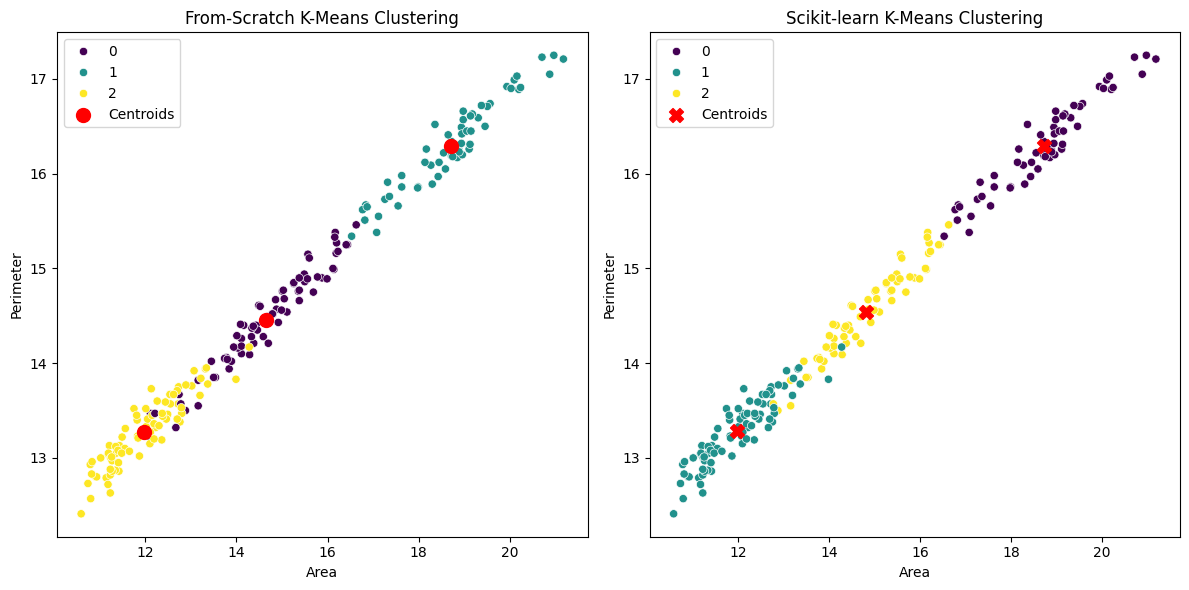

In [164]:
# Visualize from-scratch clusters and centroids
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_seeds, x="area", y="perimeter", hue="Cluster", palette="viridis", legend="full")
plt.scatter(centroids_scratch[:, 0], centroids_scratch[:, 1], c='red', marker='o', s=100, label='Centroids')
plt.title('From-Scratch K-Means Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()

# Visualize scikit-learn clusters and centroids
df_seeds['Cluster_sklearn'] = labels_sklearn
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_seeds, x="area", y="perimeter", hue="Cluster_sklearn", palette="viridis", legend="full")
plt.scatter(centroids_sklearn[:, 0], centroids_sklearn[:, 1], c='red', marker='X', s=100, label='Centroids')
plt.title('Scikit-learn K-Means Clustering')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()

plt.tight_layout()
plt.show()